In [36]:
import itertools
import numpy as np

from utils import load_eye_data, split_eye_data, load_bank_data, split_bank_data, elbow_method, BIC_scores, \
    show_class_splits, plot_roc_curve, plot_learning_curve

from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA, FastICA
from sklearn.random_projection import GaussianRandomProjection, SparseRandomProjection
from sklearn.manifold import TSNE

from scipy import linalg
from scipy.spatial.distance import cdist
from scipy.stats import kurtosis

import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.neural_network import MLPClassifier

In [37]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Eye Data

In [38]:
x, y = load_eye_data()

## Clustering

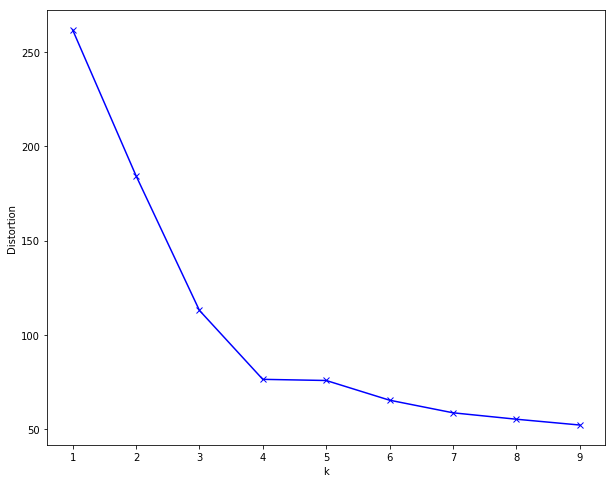

In [4]:
elbow_method(x, range(1, 10))

In [5]:
clusters = KMeans(4).fit_predict(x)
show_class_splits(clusters, y)

[8255] [6722]
[1] [0]
[1] [0]
[0] [1]


In [6]:
x[clusters!=0]

,af3,f7,f3,fc5,t7,p7,o1,o2,p8,t8,fc6,f4,f8,af4
898,7222.05,3797.95,1040.00,3733.85,6040.51,362564.00,6350.26,5361.54,1357.95,6215.38,3273.33,3091.28,276.41,715897.00
10386,7398.46,2830.77,2457.44,642564.00,6474.36,8092.31,567179.00,5087.69,7143.59,1816.41,6137.95,6904.62,3504.10,121026.00
11509,309231.00,5500.51,6880.51,5416.41,5454.87,4002.05,2086.15,4770.26,265641.00,3914.87,6823.08,2257.95,152308.00,5022.56


In [7]:
x['fc5'].mean(), x['fc5'].std()

(4164.946326435247, 5216.404632299904)

In [39]:
x = x.drop(index=[898, 10386, 11509])
y = y.drop(index=[898, 10386, 11509])

In [9]:
x['af3'].mean(), x['af3'].std()

(4301.160231688588, 46.2679003794413)

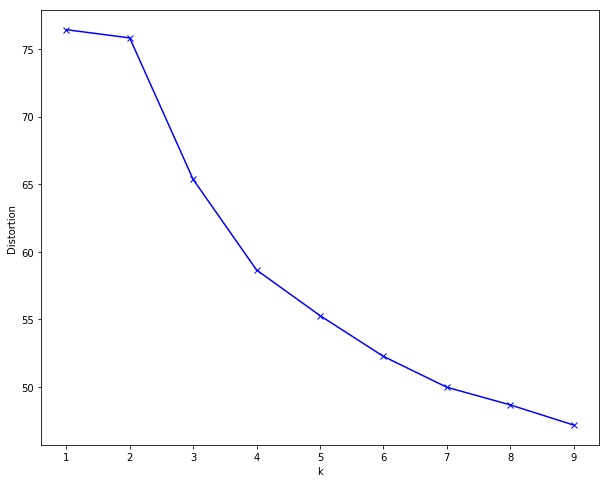

In [10]:
elbow_method(x, range(1, 10))

In [11]:
clusters = KMeans(2).fit_predict(x)
show_class_splits(clusters, y)

[8254] [6722]
[1] [0]


In [12]:
x[clusters!=0]

,af3,f7,f3,fc5,t7,p7,o1,o2,p8,t8,fc6,f4,f8,af4
13179,1030.77,7804.62,5762.56,2453.33,2089.74,2768.21,3581.54,7264.1,4586.15,6674.36,5170.77,7002.56,86.6667,1366.15


In [15]:
x['f4'].mean(), x['f4'].std()

(4279.271757361287, 29.983086034965975)

In [40]:
x = x.drop(index=[13179])
y = y.drop(index=[13179])

In [161]:
x['f4'].mean(), x['f4'].std()

(4279.08991386218, 20.09395627904484)

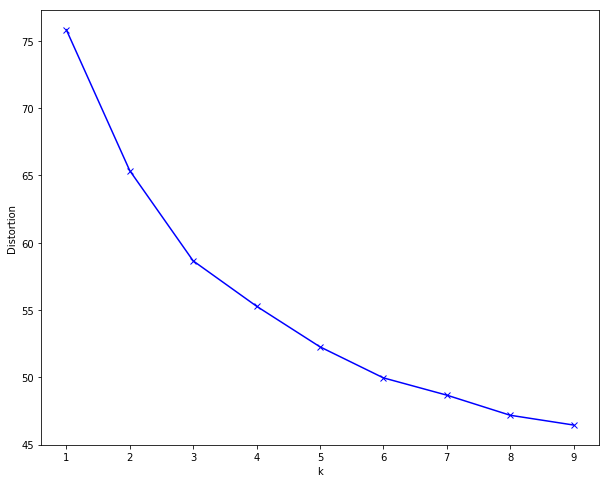

In [139]:
elbow_method(x, range(1, 10))

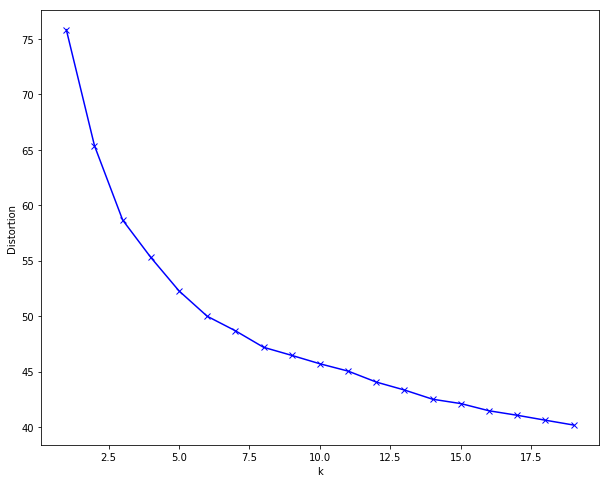

In [140]:
elbow_method(x, range(1, 20))

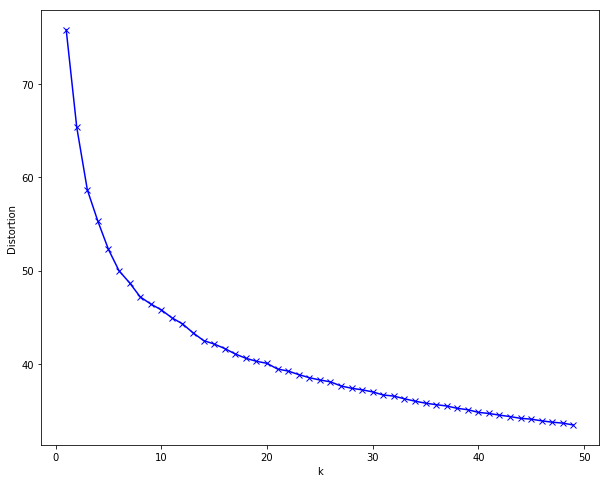

In [141]:
elbow_method(x, range(1, 50))

In [142]:
clusters = KMeans(3).fit_predict(x)
show_class_splits(clusters, y)

[621] [478]
[4617] [3143]
[3016] [3101]


In [84]:
km_clusters = KMeans(8).fit_predict(x)
show_class_splits(km_clusters, y)

[1879] [1574]
[791] [1111]
[594] [142]
[193] [207]
[1995] [1285]
[52] [441]
[402] [107]
[2348] [1855]


## Expectation Maximization

<Figure size 720x576 with 0 Axes>

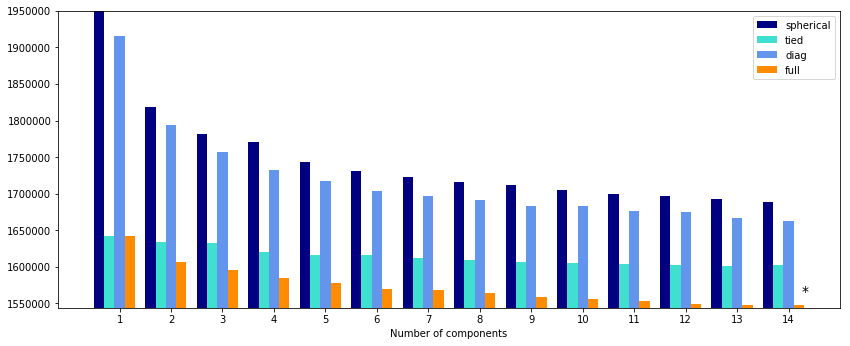

In [57]:
n = 15
plt.figure(figsize=(10, 8))
bic = BIC_scores(x, range(1, n))

Text(0, 0.5, 'BIC')

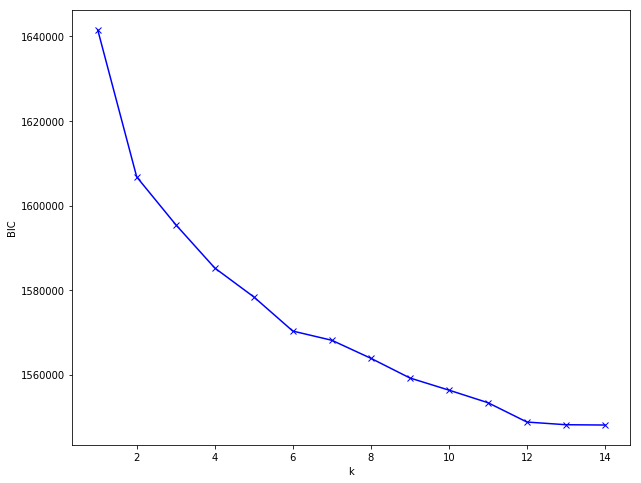

In [58]:
plt.figure(figsize=(10, 8))
plt.plot(range(1, n), bic.reshape(-1, n-1)[-1, :], 'bx-')
plt.xlabel('k')
plt.ylabel('BIC')

In [60]:
k = 6
gmm = GaussianMixture(k, 'full')
gmm.fit(x)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=6, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [62]:
em_clusters = gmm.fit_predict(x)
show_class_splits(em_clusters, y)

[1639] [635]
[831] [835]
[4340] [3265]
[381] [480]
[1005] [659]
[58] [848]


## PCA

In [67]:
pca = PCA()
pca.fit(x)

Text(0, 0.5, 'Explained Variance Ratio')

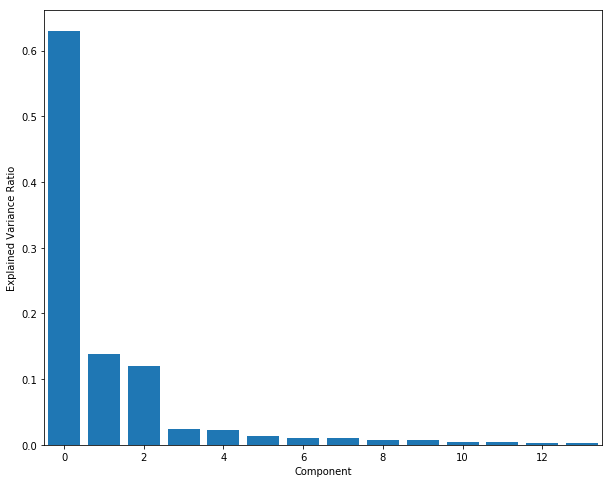

In [114]:
plt.figure(figsize=(10, 8))
plt.bar(range(14), pca.explained_variance_ratio_)
plt.xlim(-0.5, 13.5)
plt.xlabel('Component')
plt.ylabel('Explained Variance Ratio')

In [41]:
pca_red = PCA(n_components=8)
pca_red.fit(x)
x_red_pca = pca_red.transform(x)
x_recon_pca = pca_red.inverse_transform(x_red_pca)

In [220]:
np.sum(np.sqrt(np.mean(np.square(x.values - x_recon_pca), axis=0)))

57.49899042912205

In [238]:
np.mean(np.abs(x.values - x_recon_pca) / x.values, axis=0) * 100

array([0.07893657, 0.0316072 , 0.0990011 , 0.10277894, 0.09251427,
       0.08285273, 0.0308974 , 0.0854065 , 0.0859199 , 0.10934014,
       0.03455998, 0.09531029, 0.02907812, 0.08297483])

## k-Means on PCA

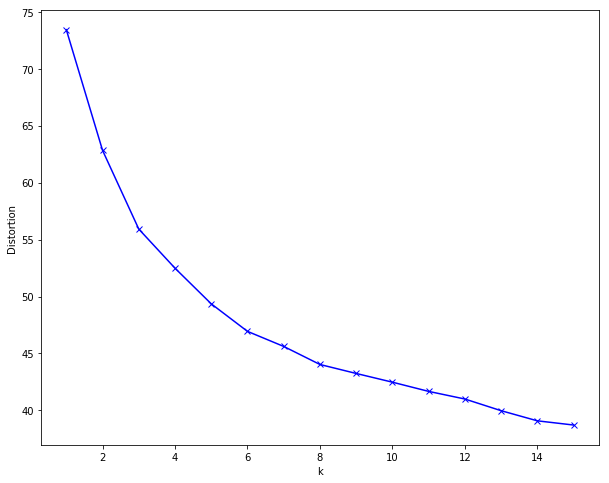

In [428]:
elbow_method(x_red_pca, range(1, 16))

In [53]:
k = 8
km_pca_clusters = KMeans(k).fit_predict(x_red_pca)
show_class_splits(km_pca_clusters, y)

[589] [141]
[1936] [1619]
[192] [207]
[50] [449]
[773] [1082]
[1930] [1228]
[404] [109]
[2380] [1887]


## EM on PCA

<Figure size 720x576 with 0 Axes>

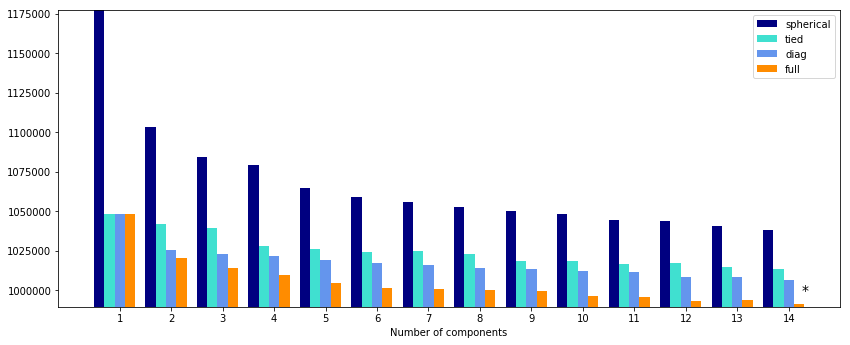

In [436]:
n = 15
plt.figure(figsize=(10, 8))
bic = BIC_scores(x_red_pca, range(1, n))

Text(0, 0.5, 'BIC')

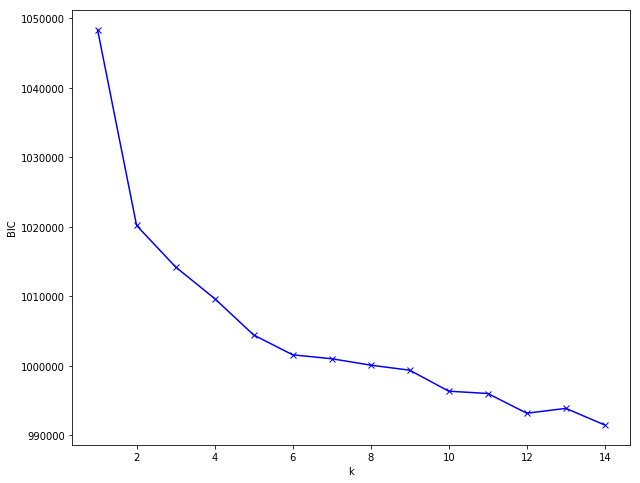

In [437]:
plt.figure(figsize=(10, 8))
plt.plot(range(1, n), bic.reshape(-1, n-1)[-1, :], 'bx-')
plt.xlabel('k')
plt.ylabel('BIC')

In [81]:
k = 6
gmm = GaussianMixture(k, 'full')
gmm.fit(x_red_pca)
em_pca_clusters = gmm.fit_predict(x_red_pca)
show_class_splits(em_pca_clusters, y)

[955] [469]
[334] [779]
[642] [485]
[1429] [1057]
[340] [367]
[4554] [3565]


## NN on PCA

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x_red_pca, y, test_size=0.15, shuffle=True, random_state=24)

In [43]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [44]:
ann = MLPClassifier((64, 64), activation='relu', solver='adam')

In [45]:
ann.fit(x_train, np.reshape(y_train.values, (-1,)))

C:\Users\Trace\Anaconda3\envs\supervised\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(64, 64), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

[learning_curve] Training set sizes: [ 1018  3309  5600  7891 10183]


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:  1.2min finished


<module 'matplotlib.pyplot' from 'C:\\Users\\Trace\\Anaconda3\\envs\\supervised\\lib\\site-packages\\matplotlib\\pyplot.py'>

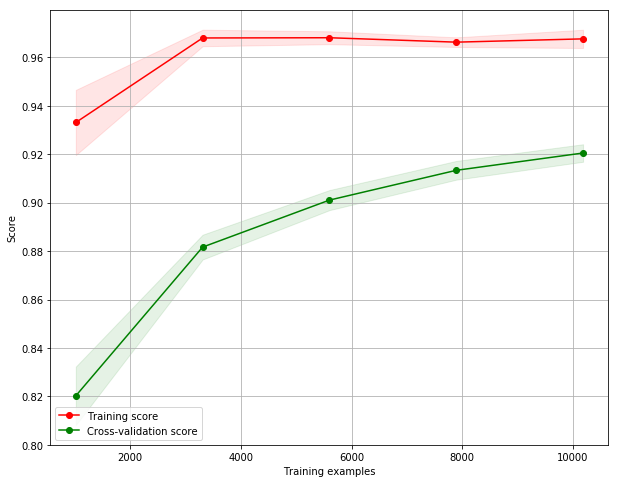

In [456]:
ann_title = 'ANN Learning Curves'
ann_cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=24)
plot_learning_curve(ann, ann_title, x_train, y_train.values.reshape(-1), cv=ann_cv, n_jobs=4, figsize=(10,8))

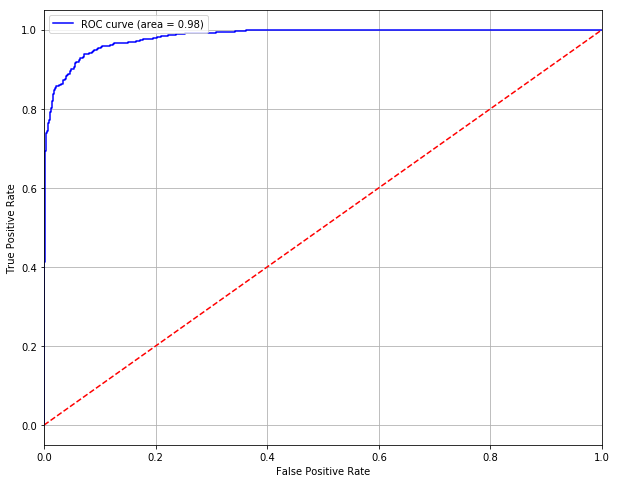

In [46]:
plot_roc_curve('ANN', y_test, ann.predict_proba(x_test)[:, 1])

In [47]:
ann_pred = ann.predict(x_test)

In [48]:
ann_cm = confusion_matrix(y_test, ann_pred)
ann_cm

array([[1199,   71],
       [  87,  890]], dtype=int64)

In [49]:
ann_acc = accuracy_score(y_test, ann_pred)
ann_acc

0.9296840231419671

In [50]:
ann_prec = precision_score(y_test, ann_pred)
ann_prec

0.9261186264308012

In [51]:
ann_rec = recall_score(y_test, ann_pred)
ann_rec

0.9109518935516888

In [52]:
ann_f1 = f1_score(y_test, ann_pred)
ann_f1

0.9184726522187822

## NN on k-Means, PCA

In [55]:
x_train, x_test, y_train, y_test = train_test_split(km_pca_clusters.reshape(-1, 1), y, test_size=0.15, shuffle=True, random_state=24)

In [56]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

C:\Users\Trace\Anaconda3\envs\supervised\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Trace\Anaconda3\envs\supervised\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Trace\Anaconda3\envs\supervised\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [57]:
ann = MLPClassifier((64, 64), activation='relu', solver='adam')

In [58]:
ann.fit(x_train, np.reshape(y_train.values, (-1,)))

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(64, 64), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

[learning_curve] Training set sizes: [ 1018  3309  5600  7891 10183]


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:   21.7s finished


<module 'matplotlib.pyplot' from 'C:\\Users\\Trace\\Anaconda3\\envs\\supervised\\lib\\site-packages\\matplotlib\\pyplot.py'>

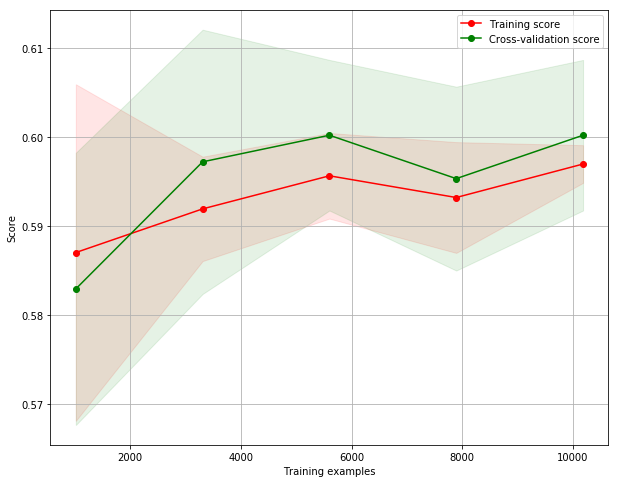

In [492]:
ann_title = 'ANN Learning Curves'
ann_cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=24)
plot_learning_curve(ann, ann_title, x_train, y_train.values.reshape(-1), cv=ann_cv, n_jobs=4, figsize=(10,8))

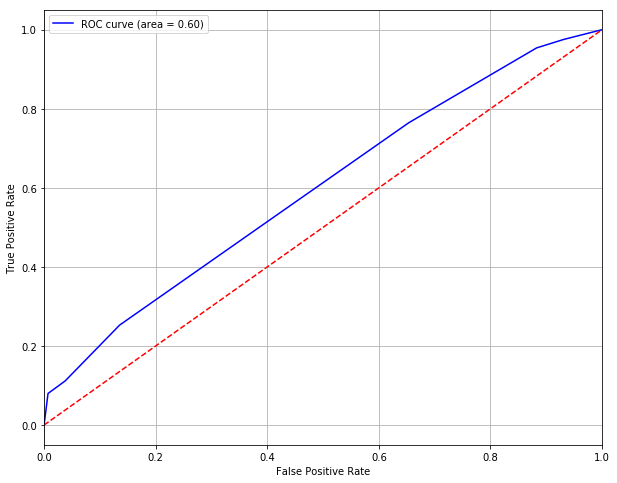

In [59]:
plot_roc_curve('ANN', y_test, ann.predict_proba(x_test)[:, 1])

In [60]:
ann_pred = ann.predict(x_test)

In [61]:
ann_cm = confusion_matrix(y_test, ann_pred)
ann_cm

array([[1098,  172],
       [ 730,  247]], dtype=int64)

In [62]:
ann_acc = accuracy_score(y_test, ann_pred)
ann_acc

0.5985758789497108

In [63]:
ann_prec = precision_score(y_test, ann_pred)
ann_prec

0.5894988066825776

In [64]:
ann_rec = recall_score(y_test, ann_pred)
ann_rec

0.25281473899692936

In [65]:
ann_f1 = f1_score(y_test, ann_pred)
ann_f1

0.35386819484240684

## NN on EM, PCA

In [500]:
x_train, x_test, y_train, y_test = train_test_split(em_pca_clusters.reshape(-1, 1), y, test_size=0.15, shuffle=True, random_state=24)

In [501]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

C:\Users\Trace\Anaconda3\envs\supervised\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Trace\Anaconda3\envs\supervised\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Trace\Anaconda3\envs\supervised\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [502]:
ann = MLPClassifier((64, 64), activation='relu', solver='adam')

In [503]:
ann.fit(x_train, np.reshape(y_train.values, (-1,)))

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(64, 64), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

[learning_curve] Training set sizes: [ 1018  3309  5600  7891 10183]


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:   12.4s finished


<module 'matplotlib.pyplot' from 'C:\\Users\\Trace\\Anaconda3\\envs\\supervised\\lib\\site-packages\\matplotlib\\pyplot.py'>

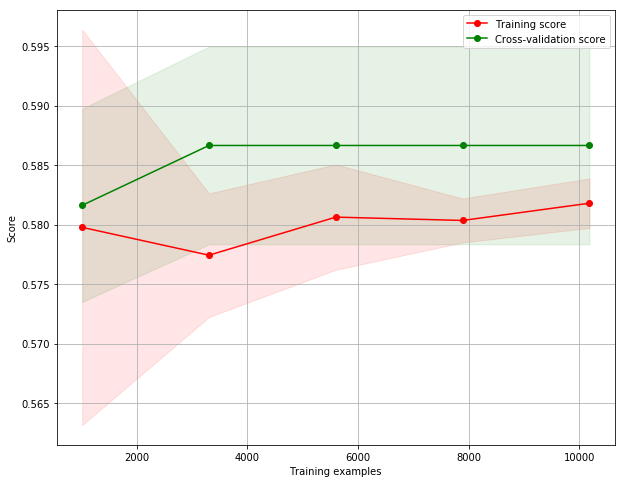

In [504]:
ann_title = 'ANN Learning Curves'
ann_cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=24)
plot_learning_curve(ann, ann_title, x_train, y_train.values.reshape(-1), cv=ann_cv, n_jobs=4, figsize=(10,8))

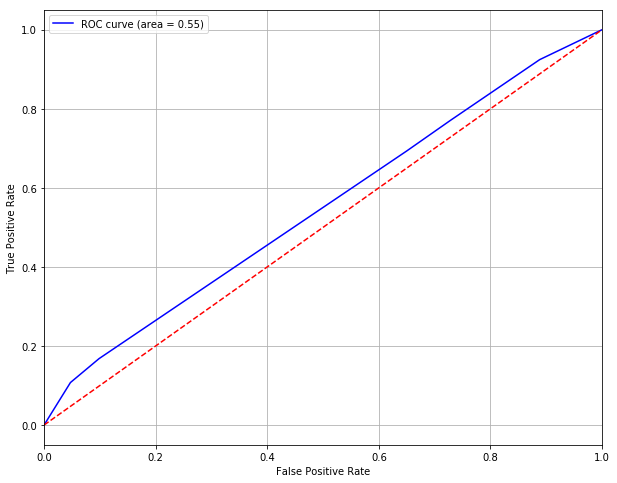

In [505]:
plot_roc_curve('ANN', y_test, ann.predict_proba(x_test)[:, 1])

In [506]:
ann_pred = ann.predict(x_test)

In [507]:
ann_cm = confusion_matrix(y_test, ann_pred)
ann_cm

array([[1145,  125],
       [ 813,  164]], dtype=int64)

In [508]:
ann_acc = accuracy_score(y_test, ann_pred)
ann_acc

0.5825545171339563

In [509]:
ann_prec = precision_score(y_test, ann_pred)
ann_prec

0.5674740484429066

In [510]:
ann_rec = recall_score(y_test, ann_pred)
ann_rec

0.16786079836233367

In [511]:
ann_f1 = f1_score(y_test, ann_pred)
ann_f1

0.25908372827804105

## NN on k-Means + PCA I

In [575]:
combined_x = np.concatenate([x_red_pca, km_pca_clusters.reshape(-1, 1)], axis=1)

In [576]:
x_train, x_test, y_train, y_test = train_test_split(combined_x, y, test_size=0.15, shuffle=True, random_state=24)

In [577]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [578]:
ann = MLPClassifier((64, 64), activation='relu', solver='adam')

In [579]:
ann.fit(x_train, np.reshape(y_train.values, (-1,)))

C:\Users\Trace\Anaconda3\envs\supervised\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(64, 64), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


[learning_curve] Training set sizes: [ 1018  3309  5600  7891 10183]


[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:  1.2min finished


<module 'matplotlib.pyplot' from 'C:\\Users\\Trace\\Anaconda3\\envs\\supervised\\lib\\site-packages\\matplotlib\\pyplot.py'>

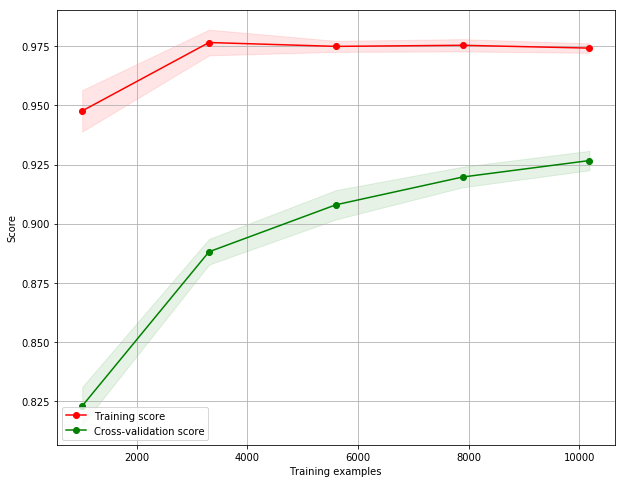

In [580]:
ann_title = 'ANN Learning Curves'
ann_cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=24)
plot_learning_curve(ann, ann_title, x_train, y_train.values.reshape(-1), cv=ann_cv, n_jobs=4, figsize=(10,8))

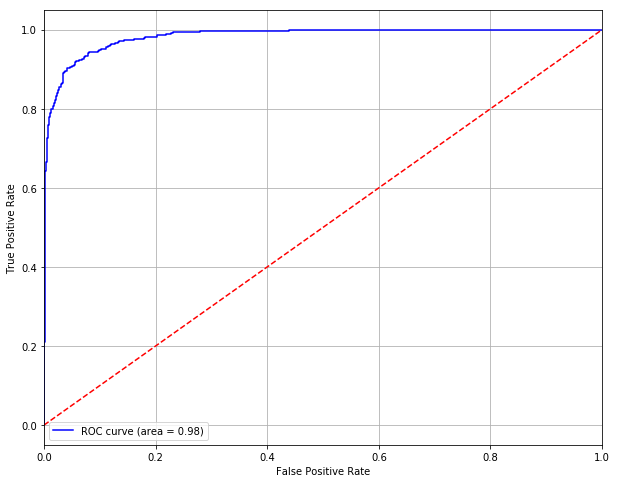

In [581]:
plot_roc_curve('ANN', y_test, ann.predict_proba(x_test)[:, 1])

In [582]:
ann_pred = ann.predict(x_test)

In [583]:
ann_cm = confusion_matrix(y_test, ann_pred)
ann_cm

array([[1191,   79],
       [  76,  901]], dtype=int64)

In [584]:
ann_acc = accuracy_score(y_test, ann_pred)
ann_acc

0.9310191366266133

In [585]:
ann_prec = precision_score(y_test, ann_pred)
ann_prec

0.9193877551020408

In [586]:
ann_rec = recall_score(y_test, ann_pred)
ann_rec

0.9222108495394064

In [587]:
ann_f1 = f1_score(y_test, ann_pred)
ann_f1

0.9207971384772612

## NN on k-Means + PCA II

In [597]:
encoder = OneHotEncoder(categories='auto', sparse=False)

In [85]:
#x_clusters = np.concatenate([x, encoder.fit_transform(km_clusters.reshape(-1, 1))], axis=1)
x_clusters = np.concatenate([km_clusters.reshape(-1, 1), x], axis=1)

In [86]:
pca = PCA()
pca.fit(x_clusters)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [88]:
pca.explained_variance_ratio_

array([0.62998125, 0.13760893, 0.1203736 , 0.02458047, 0.02206421,
       0.01371208, 0.01044009, 0.01023576, 0.00770415, 0.00694379,
       0.00475631, 0.00431955, 0.00331498, 0.00329177, 0.00067308])

## ICA

In [208]:
ica = FastICA()

In [209]:
ica.fit(x)

FastICA(algorithm='parallel', fun='logcosh', fun_args=None, max_iter=200,
    n_components=None, random_state=None, tol=0.0001, w_init=None,
    whiten=True)

In [210]:
x_transformed = ica.fit_transform(x)

Text(0, 0.5, 'Delta Kurtosis (from Gaussian)')

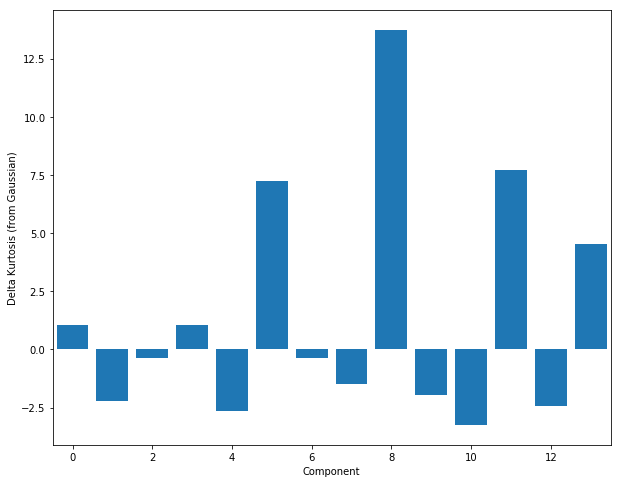

In [211]:
plt.figure(figsize=(10, 8))
plt.bar(range(14), (kurtosis(x_transformed, axis=0) - 3))
plt.xlim(-0.5, 13.5)
plt.xlabel('Component')
plt.ylabel('Delta Kurtosis (from Gaussian)')

In [222]:
ica_red = FastICA(n_components=12, max_iter=5000)

In [223]:
x_red_ica = ica_red.fit_transform(x)

C:\Users\Trace\Anaconda3\envs\supervised\lib\site-packages\sklearn\decomposition\fastica_.py:121: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


Text(0, 0.5, 'Delta Kurtosis (from Gaussian)')

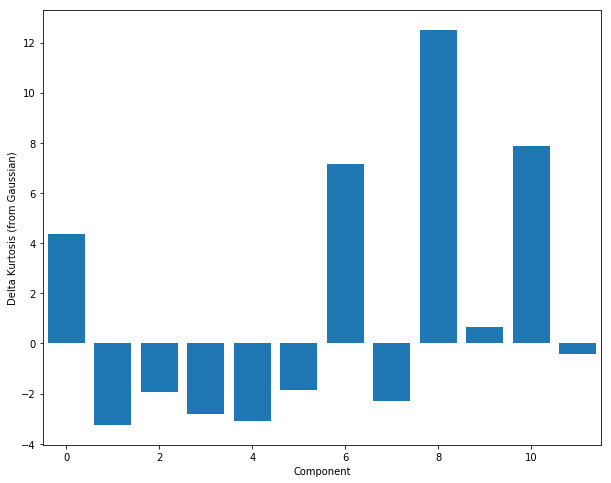

In [224]:
plt.figure(figsize=(10, 8))
plt.bar(range(12), (kurtosis(x_red_ica, axis=0) - 3))
plt.xlim(-0.5, 11.5)
plt.xlabel('Component')
plt.ylabel('Delta Kurtosis (from Gaussian)')

In [225]:
x_recon_ica = ica_red.inverse_transform(x_red_ica)

In [226]:
np.sum(np.sqrt(np.mean(np.square(x.values - x_recon_ica), axis=0)))

23.075753195590192

In [239]:
np.mean(np.abs(x.values - x_recon_ica) / x.values, axis=0) * 100

array([0.01725736, 0.00406055, 0.03958809, 0.01188641, 0.04730539,
       0.01108944, 0.02073569, 0.04003685, 0.06898931, 0.03559148,
       0.01532594, 0.08202916, 0.00730034, 0.02283887])

## K-Means on ICA

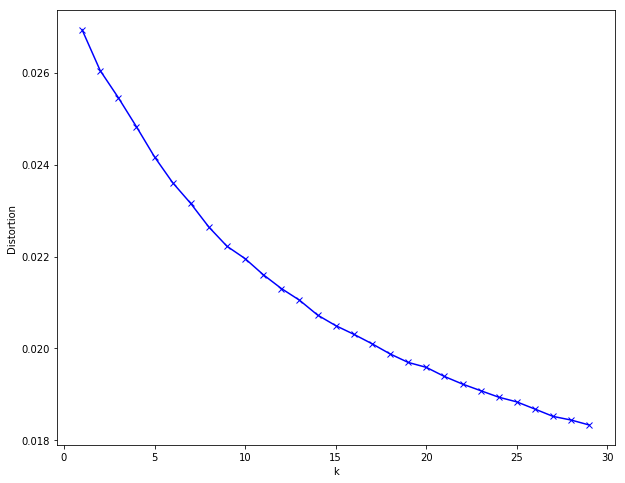

In [435]:
elbow_method(x_red_ica, range(1, 30))

In [513]:
k = 8
km_ica_clusters = KMeans(k).fit_predict(x_red_ica)
show_class_splits(clusters, y)

[2380] [1888]
[779] [1084]
[1961] [1663]
[192] [207]
[404] [109]
[48] [452]
[586] [141]
[1904] [1178]


## EM on ICA

<Figure size 720x576 with 0 Axes>

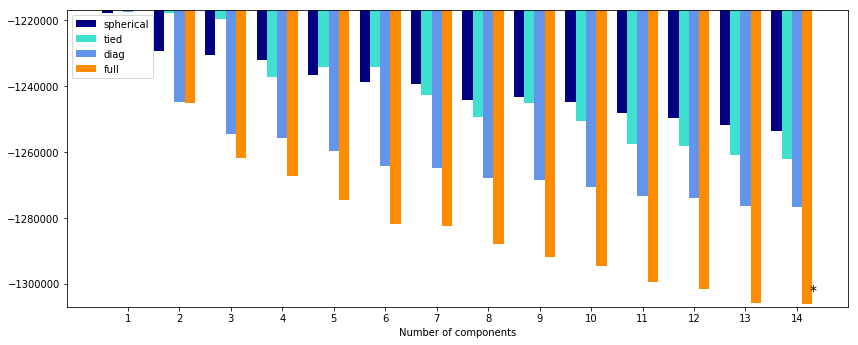

In [439]:
n = 15
plt.figure(figsize=(10, 8))
bic = BIC_scores(x_red_ica, range(1, n))

Text(0, 0.5, 'BIC')

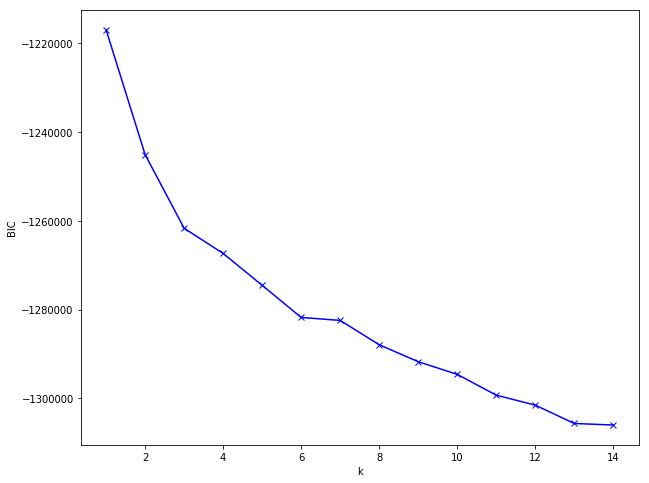

In [440]:
plt.figure(figsize=(10, 8))
plt.plot(range(1, n), bic.reshape(-1, n-1)[-1, :], 'bx-')
plt.xlabel('k')
plt.ylabel('BIC')

In [512]:
k = 6
gmm = GaussianMixture(k, 'full')
gmm.fit(x_red_ica)
em_ica_clusters = gmm.fit_predict(x_red_ica)
show_class_splits(em_clusters, y)

[1427] [1059]
[340] [367]
[333] [781]
[954] [472]
[4557] [3561]
[643] [482]


## NN on ICA

In [466]:
x_train, x_test, y_train, y_test = train_test_split(x_red_ica, y, test_size=0.15, shuffle=True, random_state=24)

In [467]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [468]:
ann = MLPClassifier((64, 64), activation='relu', solver='adam')

In [469]:
ann.fit(x_train, np.reshape(y_train.values, (-1,)))

C:\Users\Trace\Anaconda3\envs\supervised\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(64, 64), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


[learning_curve] Training set sizes: [ 1018  3309  5600  7891 10183]


[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:  1.2min finished


<module 'matplotlib.pyplot' from 'C:\\Users\\Trace\\Anaconda3\\envs\\supervised\\lib\\site-packages\\matplotlib\\pyplot.py'>

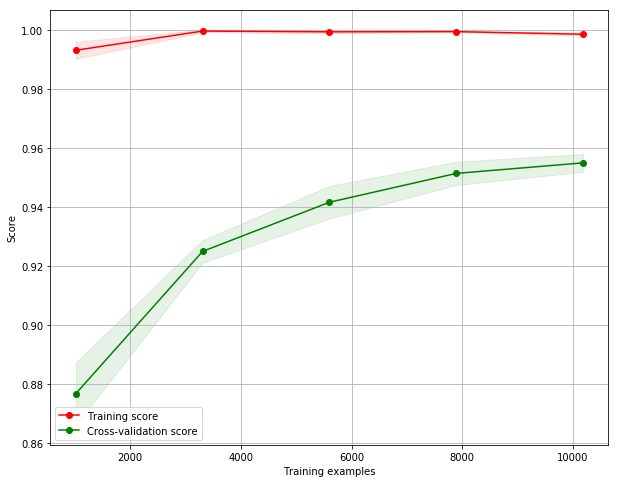

In [470]:
ann_title = 'ANN Learning Curves'
ann_cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=24)
plot_learning_curve(ann, ann_title, x_train, y_train.values.reshape(-1), cv=ann_cv, n_jobs=4, figsize=(10,8))

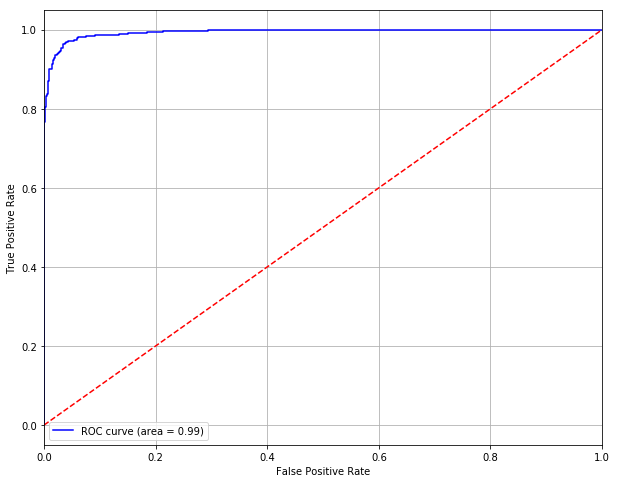

In [471]:
plot_roc_curve('ANN', y_test, ann.predict_proba(x_test)[:, 1])

In [472]:
ann_pred = ann.predict(x_test)

In [473]:
ann_cm = confusion_matrix(y_test, ann_pred)
ann_cm

array([[1231,   39],
       [  47,  930]], dtype=int64)

In [474]:
ann_acc = accuracy_score(y_test, ann_pred)
ann_acc

0.9617267467734757

In [475]:
ann_prec = precision_score(y_test, ann_pred)
ann_prec

0.9597523219814241

In [476]:
ann_rec = recall_score(y_test, ann_pred)
ann_rec

0.9518935516888434

In [477]:
ann_f1 = f1_score(y_test, ann_pred)
ann_f1

0.9558067831449126

## NN on k-Means, ICA

In [515]:
x_train, x_test, y_train, y_test = train_test_split(km_ica_clusters.reshape(-1, 1), y, test_size=0.15, shuffle=True, random_state=24)

In [516]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

C:\Users\Trace\Anaconda3\envs\supervised\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Trace\Anaconda3\envs\supervised\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Trace\Anaconda3\envs\supervised\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [517]:
ann = MLPClassifier((64, 64), activation='relu', solver='adam')

In [518]:
ann.fit(x_train, np.reshape(y_train.values, (-1,)))

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(64, 64), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

[learning_curve] Training set sizes: [ 1018  3309  5600  7891 10183]


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:   17.1s finished


<module 'matplotlib.pyplot' from 'C:\\Users\\Trace\\Anaconda3\\envs\\supervised\\lib\\site-packages\\matplotlib\\pyplot.py'>

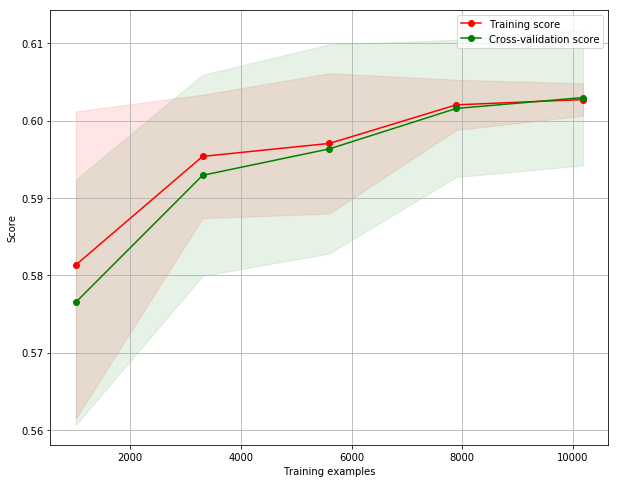

In [519]:
ann_title = 'ANN Learning Curves'
ann_cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=24)
plot_learning_curve(ann, ann_title, x_train, y_train.values.reshape(-1), cv=ann_cv, n_jobs=4, figsize=(10,8))

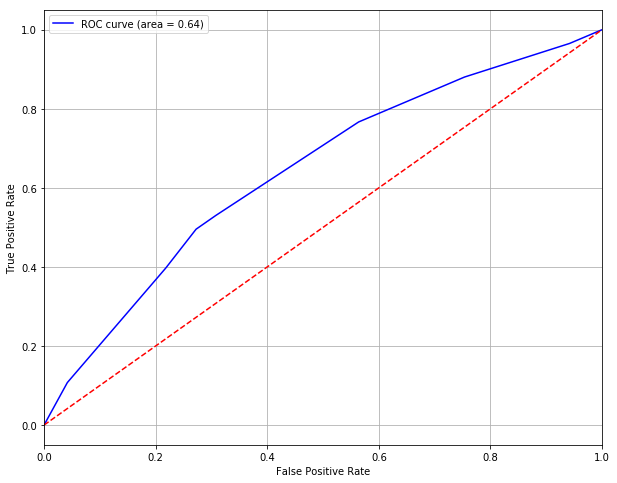

In [520]:
plot_roc_curve('ANN', y_test, ann.predict_proba(x_test)[:, 1])

In [521]:
ann_pred = ann.predict(x_test)

In [522]:
ann_cm = confusion_matrix(y_test, ann_pred)
ann_cm

array([[879, 391],
       [459, 518]], dtype=int64)

In [523]:
ann_acc = accuracy_score(y_test, ann_pred)
ann_acc

0.6217178460169115

In [524]:
ann_prec = precision_score(y_test, ann_pred)
ann_prec

0.5698569856985699

In [525]:
ann_rec = recall_score(y_test, ann_pred)
ann_rec

0.5301944728761515

In [526]:
ann_f1 = f1_score(y_test, ann_pred)
ann_f1

0.5493107104984093

## NN on EM, ICA

In [539]:
x_train, x_test, y_train, y_test = train_test_split(em_ica_clusters.reshape(-1, 1), y, test_size=0.15, shuffle=True, random_state=24)

In [540]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

C:\Users\Trace\Anaconda3\envs\supervised\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Trace\Anaconda3\envs\supervised\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Trace\Anaconda3\envs\supervised\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [541]:
ann = MLPClassifier((64, 64), activation='relu', solver='adam')

In [542]:
ann.fit(x_train, np.reshape(y_train.values, (-1,)))

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(64, 64), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

[learning_curve] Training set sizes: [ 1018  3309  5600  7891 10183]


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:   12.1s finished


<module 'matplotlib.pyplot' from 'C:\\Users\\Trace\\Anaconda3\\envs\\supervised\\lib\\site-packages\\matplotlib\\pyplot.py'>

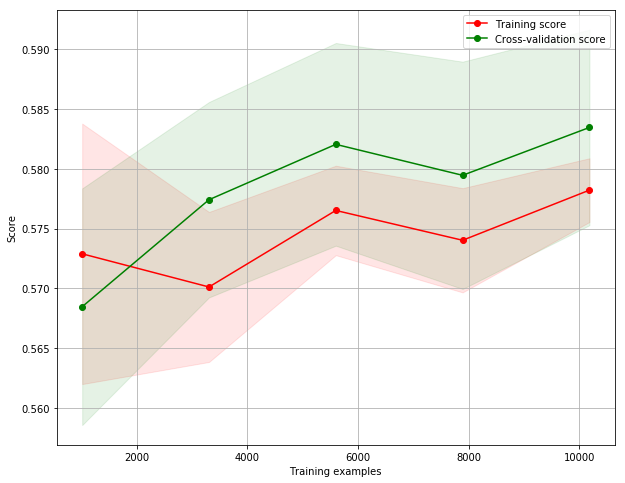

In [543]:
ann_title = 'ANN Learning Curves'
ann_cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=24)
plot_learning_curve(ann, ann_title, x_train, y_train.values.reshape(-1), cv=ann_cv, n_jobs=4, figsize=(10,8))

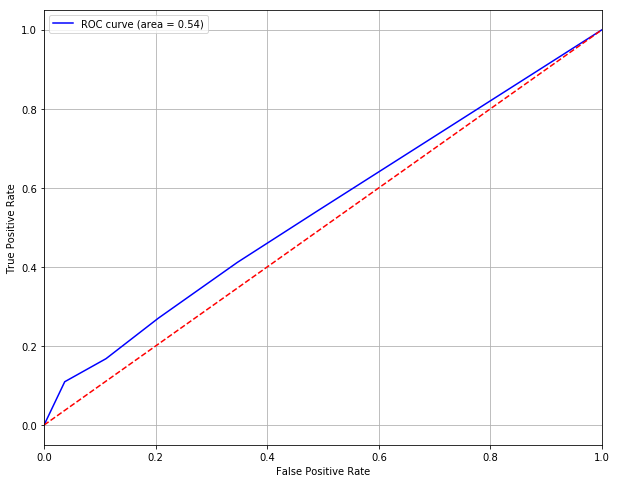

In [544]:
plot_roc_curve('ANN', y_test, ann.predict_proba(x_test)[:, 1])

In [545]:
ann_pred = ann.predict(x_test)

In [546]:
ann_cm = confusion_matrix(y_test, ann_pred)
ann_cm

array([[1223,   47],
       [ 870,  107]], dtype=int64)

In [547]:
ann_acc = accuracy_score(y_test, ann_pred)
ann_acc

0.5919003115264797

In [548]:
ann_prec = precision_score(y_test, ann_pred)
ann_prec

0.6948051948051948

In [549]:
ann_rec = recall_score(y_test, ann_pred)
ann_rec

0.10951893551688843

In [550]:
ann_f1 = f1_score(y_test, ann_pred)
ann_f1

0.18921308576480989

## NN on k-Means + ICA

In [562]:
combined_x = np.concatenate([x_red_ica, km_ica_clusters.reshape(-1, 1)], axis=1)

In [563]:
x_train, x_test, y_train, y_test = train_test_split(combined_x, y, test_size=0.15, shuffle=True, random_state=24)

In [564]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [565]:
ann = MLPClassifier((64, 64), activation='relu', solver='adam')

In [566]:
ann.fit(x_train, np.reshape(y_train.values, (-1,)))

C:\Users\Trace\Anaconda3\envs\supervised\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(64, 64), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


[learning_curve] Training set sizes: [ 1018  3309  5600  7891 10183]


[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:  1.2min finished


<module 'matplotlib.pyplot' from 'C:\\Users\\Trace\\Anaconda3\\envs\\supervised\\lib\\site-packages\\matplotlib\\pyplot.py'>

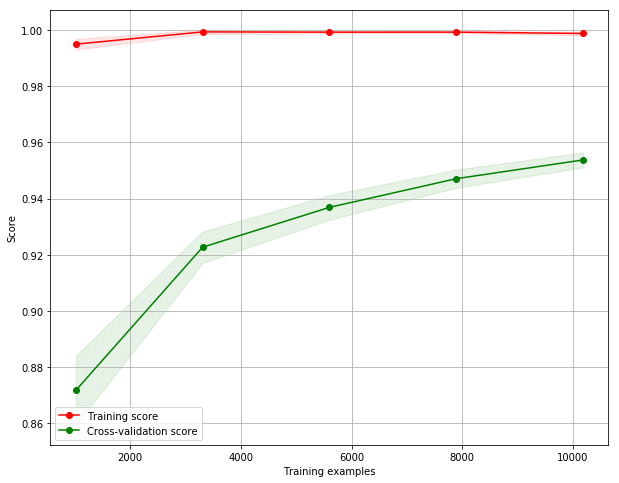

In [567]:
ann_title = 'ANN Learning Curves'
ann_cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=24)
plot_learning_curve(ann, ann_title, x_train, y_train.values.reshape(-1), cv=ann_cv, n_jobs=4, figsize=(10,8))

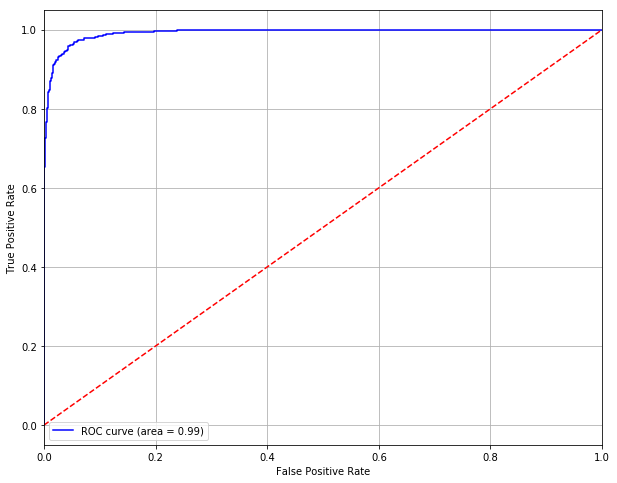

In [568]:
plot_roc_curve('ANN', y_test, ann.predict_proba(x_test)[:, 1])

In [569]:
ann_pred = ann.predict(x_test)

In [570]:
ann_cm = confusion_matrix(y_test, ann_pred)
ann_cm

array([[1241,   29],
       [  75,  902]], dtype=int64)

In [571]:
ann_acc = accuracy_score(y_test, ann_pred)
ann_acc

0.9537160658655985

In [572]:
ann_prec = precision_score(y_test, ann_pred)
ann_prec

0.9688506981740065

In [573]:
ann_rec = recall_score(y_test, ann_pred)
ann_rec

0.9232343909928352

In [574]:
ann_f1 = f1_score(y_test, ann_pred)
ann_f1

0.9454926624737945

## Randomized Projection

In [386]:
gauss_random = GaussianRandomProjection(n_components=12, eps=0.1)

In [387]:
x_red_ran = gauss_random.fit_transform(x)

In [388]:
x_recon_ran = np.matmul(x_red_ran, gauss_random.components_)

In [389]:
np.sum(np.sqrt(np.mean(np.square(x.values - x_recon_ran), axis=0)))

38642.144984547995

In [390]:
np.mean(np.abs(x.values - x_recon_ran) / x.values, axis=0) * 100

array([ 36.91409245,  71.84646632, 146.89714914, 137.15919771,
        48.06738289,  47.97808362,  85.71220856,  47.04990038,
        52.94884023,  21.23943434, 151.97465228,   7.49180165,
         3.50169572,  52.66614777])

In [381]:
sparse_random = SparseRandomProjection(n_components=12, eps=0.1)

In [382]:
x_red_sprs = sparse_random.fit_transform(x)

In [383]:
x_recon_sprs = np.matmul(x_red_sprs, sparse_random.components_.todense())

In [384]:
np.sum(np.sqrt(np.mean(np.square(x.values - x_recon_sprs), axis=0)))

71293.58844964555

In [385]:
np.mean(np.abs(x.values - x_recon_sprs) / x.values, axis=0) * 100

matrix([[ 36.72236141, 148.07282688,   8.17924607, 217.18697601,
          54.6314565 , 422.73286989, 129.53547939, 196.36899843,
          62.29755777,  33.01273945, 107.71144009,  32.98505583,
          66.50549071, 119.64163523]])

## t-SNE

In [68]:
tsne = TSNE()

In [69]:
x_tsne = tsne.fit_transform(x)

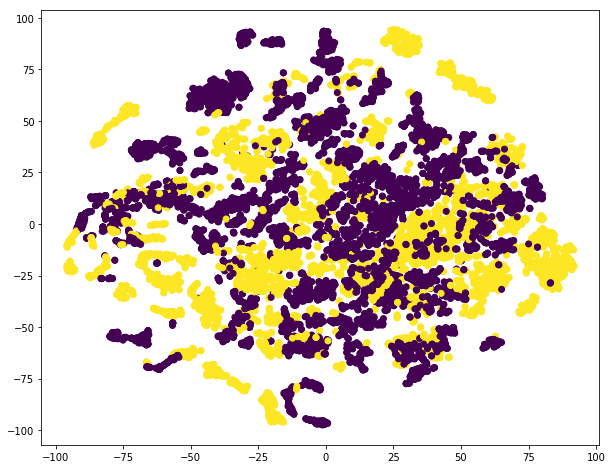

In [425]:
plt.figure(figsize=(10,8))
plt.scatter(x_tsne[:, 0], x_tsne[:, 1], c=y.values.reshape(-1,))#, cmap=plt.cm.rainbow)

## NN on t-SNE

In [70]:
x_train, x_test, y_train, y_test = train_test_split(x_tsne, y, test_size=0.15, shuffle=True, random_state=24)

In [71]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [72]:
ann = MLPClassifier((64, 64), activation='relu', solver='adam')

In [73]:
ann.fit(x_train, np.reshape(y_train.values, (-1,)))

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(64, 64), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

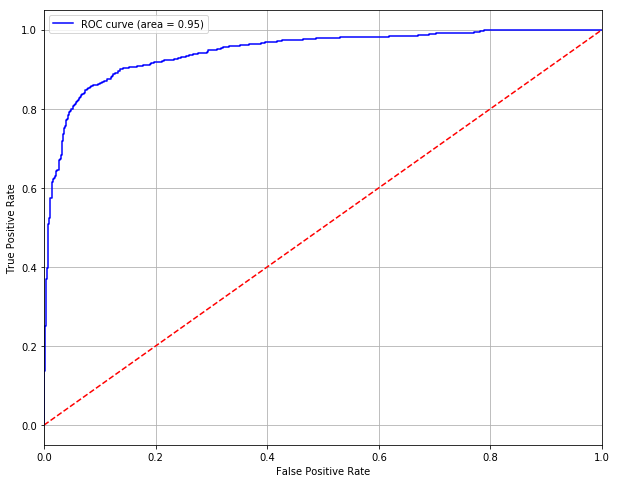

In [74]:
plot_roc_curve('ANN', y_test, ann.predict_proba(x_test)[:, 1])

In [75]:
ann_pred = ann.predict(x_test)

In [76]:
ann_cm = confusion_matrix(y_test, ann_pred)
ann_cm

array([[1190,   80],
       [ 169,  808]], dtype=int64)

In [77]:
ann_acc = accuracy_score(y_test, ann_pred)
ann_acc

0.8891855807743658

In [78]:
ann_prec = precision_score(y_test, ann_pred)
ann_prec

0.9099099099099099

In [79]:
ann_rec = recall_score(y_test, ann_pred)
ann_rec

0.827021494370522

In [80]:
ann_f1 = f1_score(y_test, ann_pred)
ann_f1

0.8664879356568363